In [1]:
import tarfile
import matplotlib.pyplot as plt
from pathlib import Path
from dysh.util.download import from_url
from dysh.fits.gbtfitsload import GBTFITSLoad
from dysh.util.selection import Selection
from dysh.spectra.core import average
import numpy as np
import pandas as pd
from scipy.stats import median_abs_deviation

In [28]:
path_to_raw_vegas = f"/home/sdfits/AGBT24B_251_02/AGBT24B_251_02.raw.vegas/" 
sdfits = GBTFITSLoad(path_to_raw_vegas, backend="VEGAS")

Flags were created from existing flag files. Use GBTFITSLoad.flags.show() to see them.


In [29]:
sdfits.flags.show()

 ID TAG OBJECT BANDWID DATE-OBS ... SUBOBSMODE FITSINDEX CHAN UTC # SELECTED
--- --- ------ ------- -------- ... ---------- --------- ---- --- ----------


In [4]:
sdfits.summary()

,SCAN,OBJECT,VELOCITY,PROC,PROCSEQN,RESTFREQ,DOPFREQ,# IF,# POL,# INT,# FEED,AZIMUTH,ELEVATIO
0,6,BC22,801.0,OnOff,1,1.420406,1.420406,1,2,61,1,97.59854,21.908178
1,7,BC22,801.0,OnOff,2,1.420406,1.420406,1,2,61,1,99.79335,21.73278
2,8,BC22,801.0,OnOff,1,1.420406,1.420406,1,2,61,1,99.39169,23.975813
3,9,BC22,801.0,OnOff,2,1.420406,1.420406,1,2,61,1,100.781647,23.593848
4,10,BC22,801.0,OnOff,1,1.420406,1.420406,1,2,61,1,101.231538,26.036336
5,11,BC22,801.0,OnOff,2,1.420406,1.420406,1,2,61,1,102.421806,25.077636
6,12,BC22,801.0,OnOff,1,1.420406,1.420406,1,2,61,1,103.146221,28.109582
7,13,BC22,801.0,OnOff,2,1.420406,1.420406,1,2,61,1,104.875261,27.198765
8,14,BC22,801.0,OnOff,1,1.420406,1.420406,1,2,61,1,105.11463,30.160391
9,15,BC22,801.0,OnOff,2,1.420406,1.420406,1,2,61,1,106.438223,28.726869


In [4]:
BC22_scans = [6, 8, 10, 12, 14, 16]

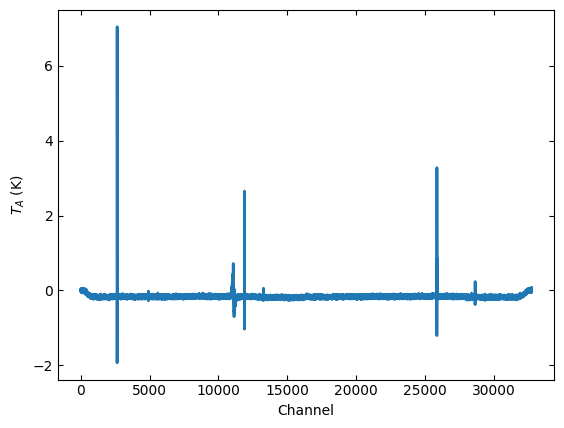

In [5]:
ps_scanblock0 = sdfits.getps(scan=BC22_scans, plnum=0)
ps0 = ps_scanblock0.timeaverage()
ps0.plot(xaxis_unit="chan")

In [30]:
flag_list = []
median_flux_array = np.array([])
MAD_flux_array = np.array([])
for scans in BC22_scans:
    Single_spectra1 = sdfits.getps(scan = scans, plnum=0)
    Single_spectra = Single_spectra1.timeaverage()
    median_flux = np.median(Single_spectra.flux).value
    median_flux_array = np.append(median_flux_array, median_flux)
    MAD_flux = median_abs_deviation(Single_spectra.flux.value)
    MAD_flux_array = np.append(MAD_flux_array, MAD_flux)
    flag_mask = np.zeros(Single_spectra.shape)
    flag_mask[np.logical_or(Single_spectra.flux.value < median_flux - 5*MAD_flux, Single_spectra.flux.value > median_flux + 5*MAD_flux)] = 1
    flag_mask = flag_mask.flatten()
    flag_chan = np.where(flag_mask==1)[0].tolist()
    print(f"{scans} number, flags:", flag_chan)
    sdfits.flag(scan = scans, channel=flag_chan, plnum=0)
    sdfits.flag(scan = scans+1, channel=flag_chan, plnum=0)
    # if flag_chan not in flag_list, then append to flag_list
    flag_list.append(flag_chan)

6 number, flags: [52, 2647, 2648, 5593, 5594, 6656, 7022, 8140, 9448, 9803, 10370, 10999, 11004, 11006, 11007, 11012, 11013, 11016, 11017, 11018, 11019, 11020, 11021, 11024, 11025, 11026, 11027, 11028, 11029, 11030, 11031, 11032, 11033, 11034, 11035, 11036, 11037, 11038, 11039, 11040, 11041, 11042, 11043, 11044, 11045, 11046, 11047, 11048, 11049, 11050, 11051, 11052, 11053, 11054, 11055, 11056, 11057, 11058, 11059, 11060, 11061, 11062, 11063, 11064, 11065, 11066, 11067, 11068, 11069, 11070, 11071, 11072, 11073, 11074, 11075, 11076, 11077, 11078, 11079, 11080, 11081, 11082, 11083, 11084, 11085, 11086, 11087, 11088, 11089, 11090, 11091, 11092, 11093, 11094, 11095, 11096, 11097, 11098, 11099, 11100, 11111, 11112, 11113, 11114, 11115, 11116, 11117, 11118, 11119, 11120, 11121, 11122, 11123, 11124, 11125, 11126, 11127, 11128, 11129, 11130, 11131, 11132, 11133, 11134, 11135, 11136, 11137, 11138, 11139, 11140, 11141, 11142, 11143, 11144, 11145, 11146, 11147, 11148, 11149, 11150, 11151, 11152, 

In [33]:
shape(flag_list)

NameError: name 'shape' is not defined

In [7]:
sdfits.flags.show()

 ID    TAG    SCAN PLNUM               CHAN               # SELECTED
--- --------- ---- ----- -------------------------------- ----------
  0 a3f64a4fc    6     0 [17,26,52,69,76...2,32752,32758]        122
  1 3c324b73d    7     0 [17,26,52,69,76...2,32752,32758]        122
 11 b131b029d   17     0 [0,1,2,3,4,5,6,...5,32766,32767]        122
  2 9ffc2321d    8     0 [0,1,3,4,13,18,...3,32765,32767]        122
  3 838b8d9fd    9     0 [0,1,3,4,13,18,...3,32765,32767]        122
  4 6aa99c9d7   10     0 [0,1,2,3,4,5,6,...5,32766,32767]        122
  5 2e92201eb   11     0 [0,1,2,3,4,5,6,...5,32766,32767]        122
  6 ce3045d2e   12     0 [0,2,4,5,6,8,9,...5,32766,32767]        122
  7 9a90f384e   13     0 [0,2,4,5,6,8,9,...5,32766,32767]        122
  8 8640a7a3b   14     0 [0,1,2,3,4,5,6,...5,32766,32767]        122
  9 77a53942b   15     0 [0,1,2,3,4,5,6,...5,32766,32767]        122
 10 644f323a4   16     0 [0,1,2,3,4,5,6,...5,32766,32767]        122


In [8]:
flag_list_int = [int(x) for x in flag_list]

(-0.5, 0.3)

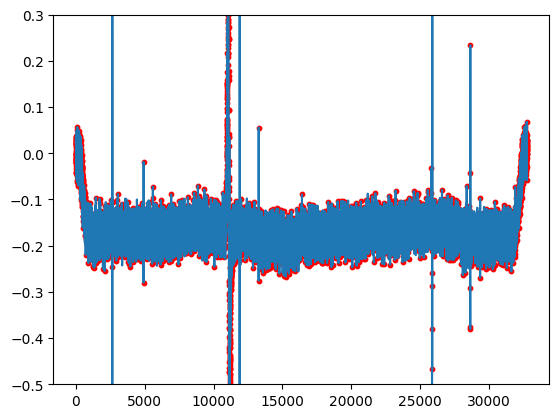

In [9]:
plt.plot(ps0.flux.value)
plt.scatter(flag_list_int, ps0.flux.value[flag_list_int], color='r', s=10)
plt.ylim(-0.5, 0.3)

INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]


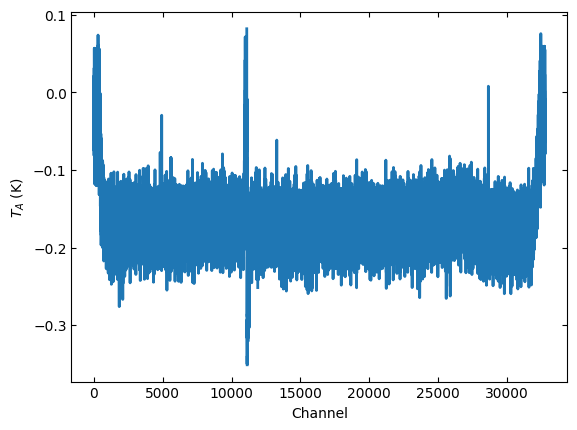

In [10]:
new_ps_scanblock = sdfits.getps(scan=BC22_scans, plnum=0)
new_ps = new_ps_scanblock.timeaverage()
new_ps.plot(xaxis_unit="chan")

INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]


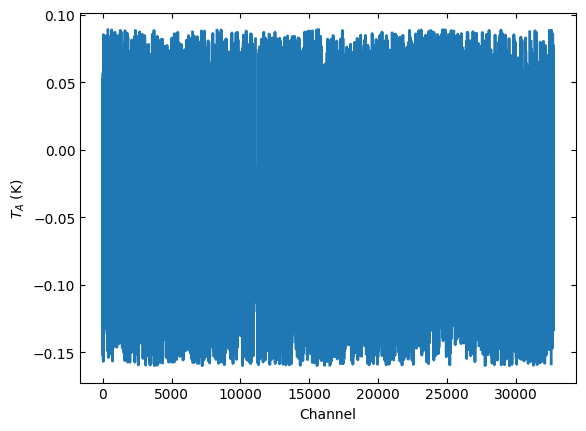

INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]


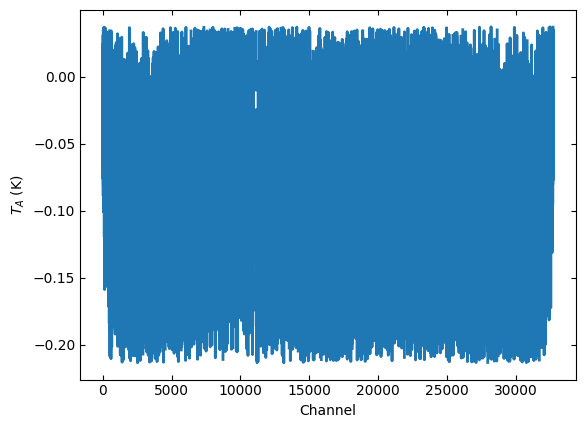

INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]


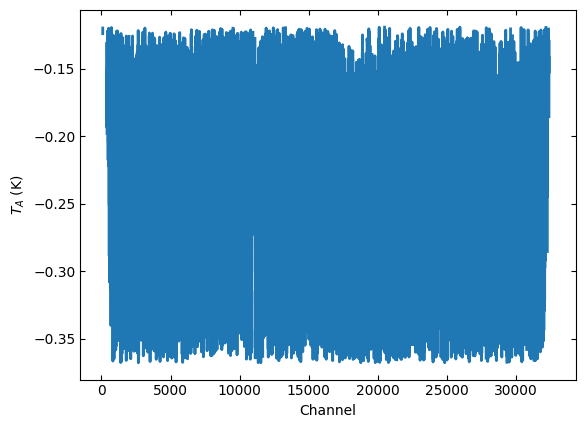

INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]


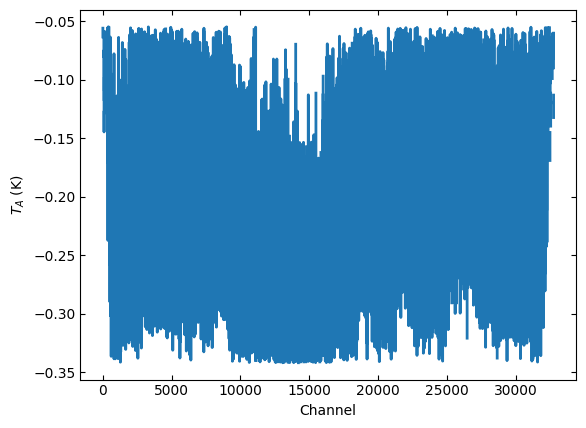

INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]


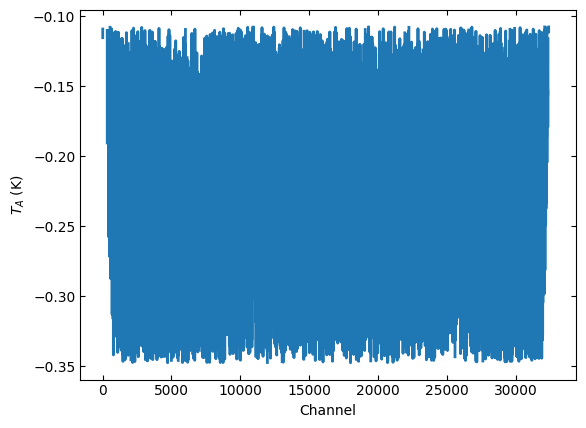

INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]


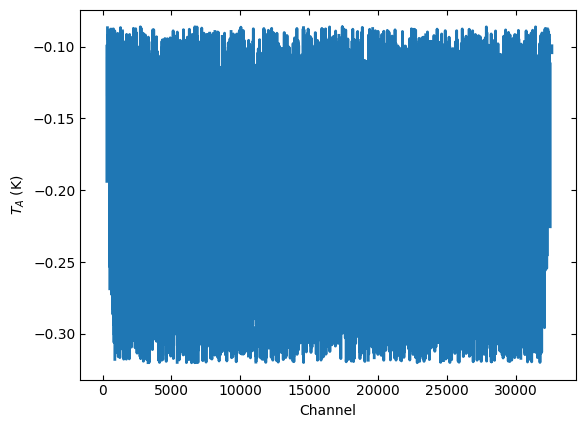

In [ ]:
for scan in BC22_scans:
    ps_scanblock = sdfits.getps(scan=scan, plnum=0)
    ps = ps_scanblock.timeaverage()
    ps.plot(xaxis_unit="chan")
    

INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specif

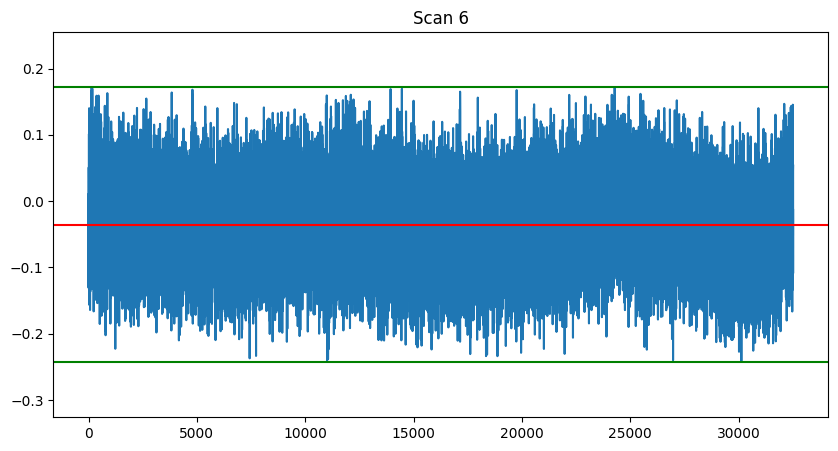

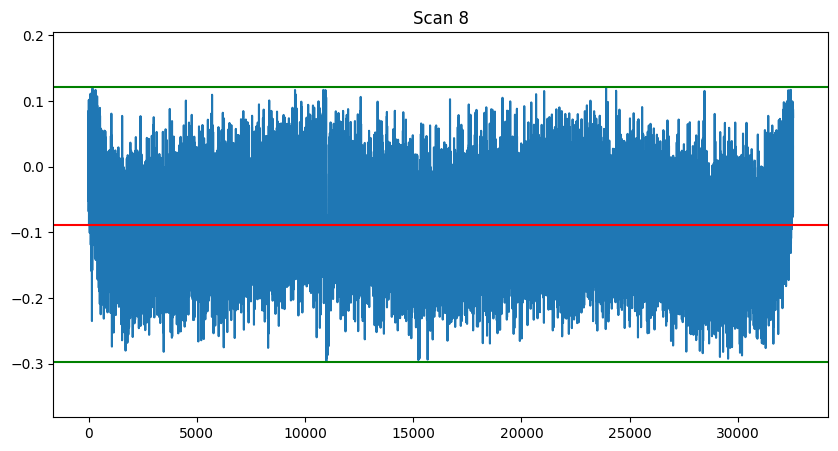

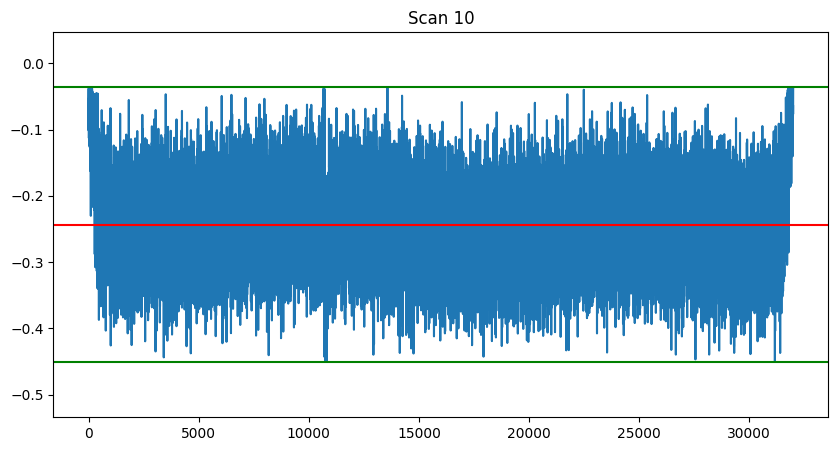

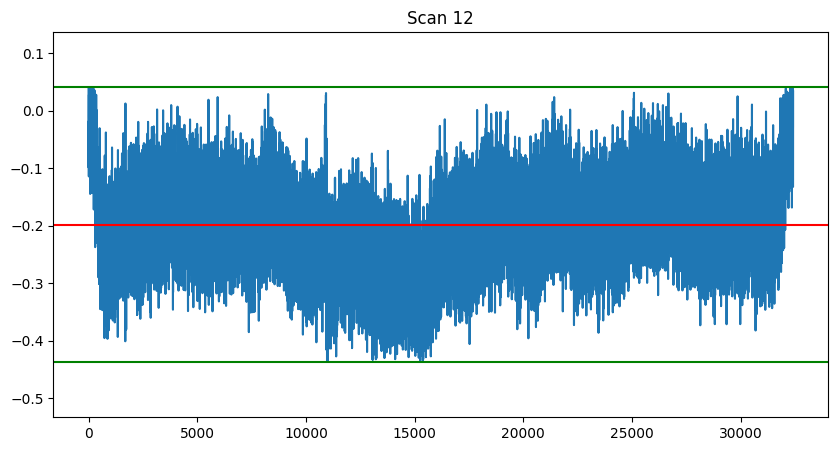

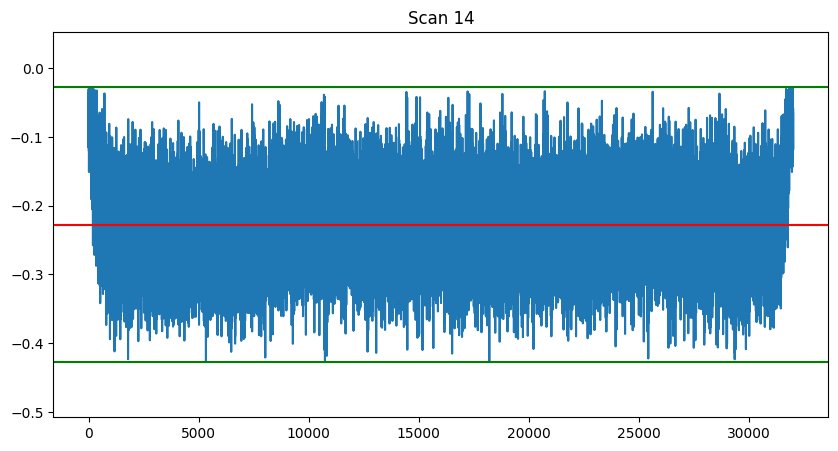

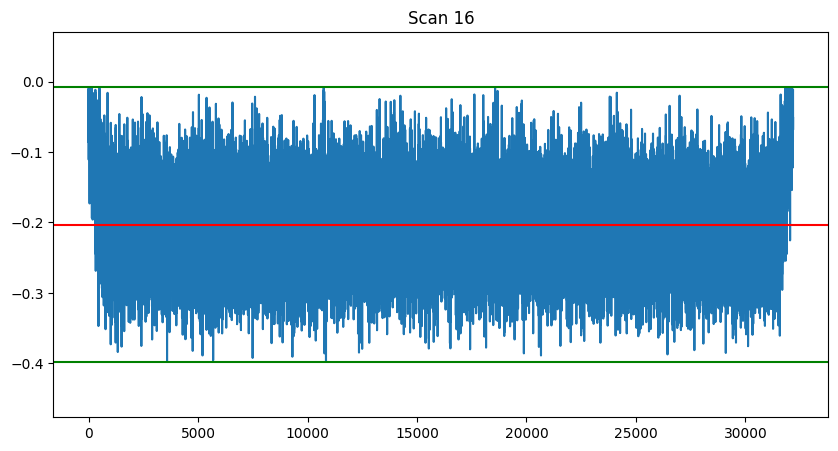

In [35]:
for i, scans in enumerate(BC22_scans):
    ps_scanblock1 = sdfits.getps(scan=scans, plnum=0)
    ps1 = ps_scanblock1.timeaverage()
    fig,ax = plt.subplots(figsize=(10,5))
    inx = range(0, len(ps1.flux.value))
    inx = list(set(inx) - set(flag_list[i]))
    ax.plot(ps1.flux.value[inx])
    ax.axhline(median_flux_array[i], color='r')
    ax.axhline(median_flux_array[i] - 5*MAD_flux_array[i], color='g')
    ax.axhline(median_flux_array[i]+ 5*MAD_flux_array[i], color='g')
    ax.set_title(f"Scan {scans}")
    ax.set_ylim(median_flux_array[i] - 7*MAD_flux_array[i], median_flux_array[i]+ 7*MAD_flux_array[i])

INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]


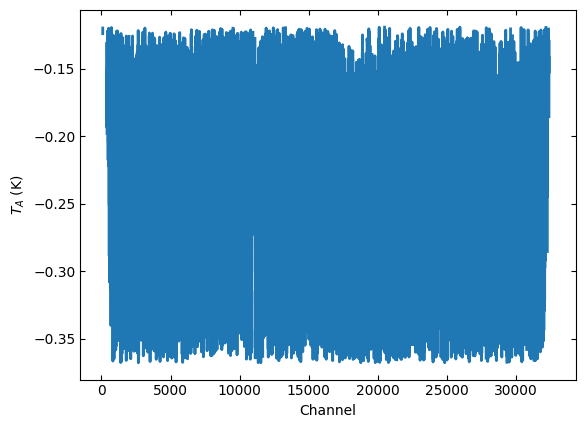

sa [0. 0. 0. ... 0. 0. 0.]


(-0.6583765409303534, 0.17113322938323008)

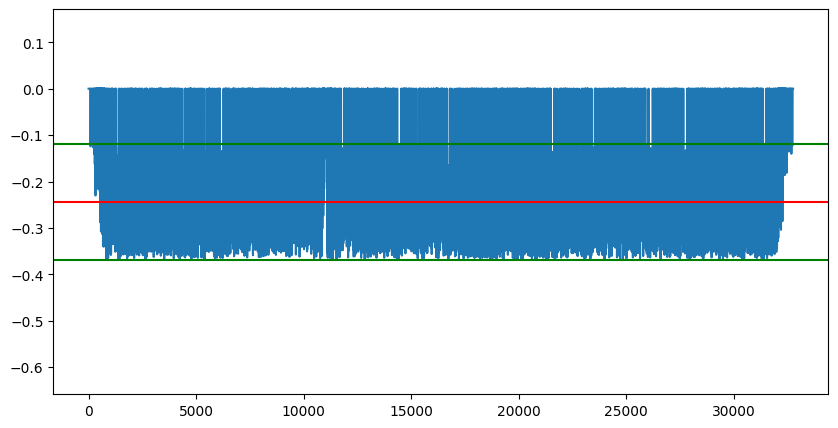

In [ ]:
scan_10 = sdfits.getps(scan=10, plnum=0)
scan_10s = scan_10.timeaverage()
scan_10s.plot(xaxis_unit="chan")
fig,ax = plt.subplots(figsize=(10,5))
print("sa", scan_10s.flux.value)
ax.plot(scan_10s.flux.value)
ax.axhline(median_flux_array[2], color='r')
ax.axhline(median_flux_array[2] - 3*MAD_flux_array[2], color='g')
ax.axhline(median_flux_array[2]+ 3*MAD_flux_array[2], color='g')
ax.set_ylim(median_flux_array[2] - 10*MAD_flux_array[2], median_flux_array[2]+ 10*MAD_flux_array[2])

INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]
INFO: overwriting Masked Quantity's current mask with specified mask. [astropy.nddata.nddata]


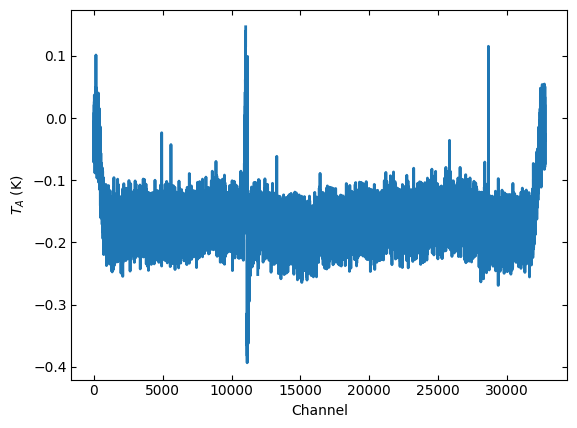

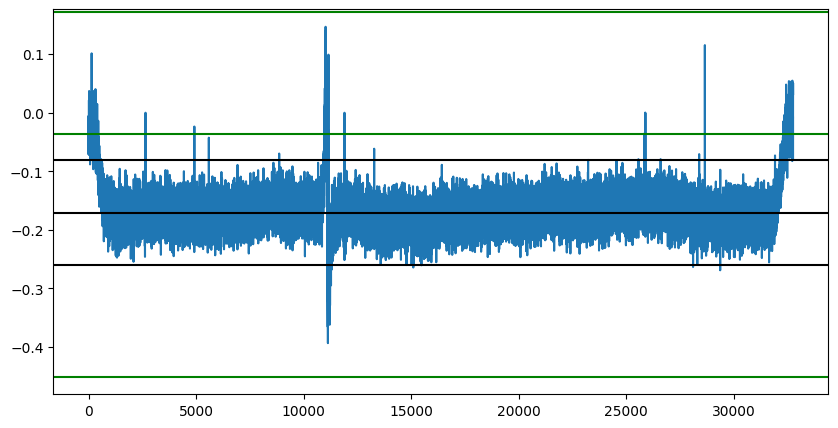

In [37]:
ps_scanblock = sdfits.getps(scan=BC22_scans, plnum=0)
ps = ps_scanblock.timeaverage()
ps.plot(xaxis_unit="chan")
fig,ax = plt.subplots(figsize=(10,5))

ax.plot(ps.flux.value)

ax.axhline(np.median(ps.flux.value), color='k')
ax.axhline(np.median(ps.flux.value) - 5*median_abs_deviation(ps.flux.value), color='k')
ax.axhline(np.median(ps.flux.value)+ 5*median_abs_deviation(ps.flux.value), color='k')


ax.axhline(max(median_flux_array), color='g')
ax.axhline(min(median_flux_array - 5*MAD_flux_array), color='g')
ax.axhline(max(median_flux_array+ 5*MAD_flux_array), color='g')

In [13]:
path_to_raw_vegas = f"/home/sdfits/AGBT24B_251_02/AGBT24B_251_02.raw.vegas/" 
ref_sdfits = GBTFITSLoad(path_to_raw_vegas, backend="VEGAS")

Flags were created from existing flag files. Use GBTFITSLoad.flags.show() to see them.


In [14]:
ref_sdfits.flags.show()

 ID TAG OBJECT BANDWID DATE-OBS ... SUBOBSMODE FITSINDEX CHAN UTC # SELECTED
--- --- ------ ------- -------- ... ---------- --------- ---- --- ----------


(-0.5, 0.3)

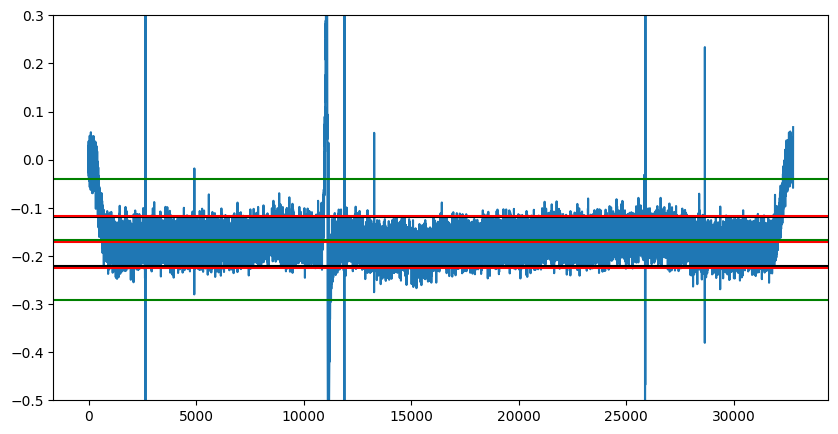

In [17]:
ref_ps_scanblock = ref_sdfits.getps(scan=BC22_scans, plnum=0)
ref_ps = ref_ps_scanblock.timeaverage()
fig,ax = plt.subplots(figsize=(10,5))
ax.plot(ref_ps.flux.value)
ax.axhline(np.median(ps.flux.value), color='k')
ax.axhline(np.median(ps.flux.value) - 3*median_abs_deviation(ps.flux.value), color='k')
ax.axhline(np.median(ps.flux.value)+ 3*median_abs_deviation(ps.flux.value), color='k')

ax.axhline(np.median(ref_ps.flux.value), color='r')
ax.axhline(np.median(ref_ps.flux.value) - 3*median_abs_deviation(ref_ps.flux.value), color='r')
ax.axhline(np.median(ref_ps.flux.value)+ 3*median_abs_deviation(ref_ps.flux.value), color='r')

ax.axhline(np.mean(median_flux_array), color='g')
ax.axhline(np.mean(median_flux_array - 3*MAD_flux_array), color='g')
ax.axhline(np.mean(median_flux_array+ 3*MAD_flux_array), color='g')

ax.set_ylim(-0.5, 0.3)

In [98]:
ax.set_ylim(-0.5, 0.3)
plt.show()